In [ ]:
Document 1: “Gangs of Wasseypur is a great movie. Wasseypur is a town in Bihar.”
Document 2: “The success of a song depends on the music.”
Document 3: “There is a new movie releasing this week. The movie is fun to watch.”

In [ ]:
TF => Term Frequency => Freq of term 't' in document 'd'/total terms in document 'd'
tf(movie,D1) = 1/7  # Gangs, Wasseypur, great, movie, Wasseypur, town, Bihar
tf(movie,D3) = 2/7  # new, movie, releasing, week, movie, fun, watch

DF => Document Freuency =>  Total number of documents have term 't'/total number of documents
df(movie) = 2/3
IDF (Inverse Document Frequency) = log(3/2)

TF-IDF => 
TF-IDF(movie,D1) = (1/7) * log(3/2) = 0.025
TF-IDF(movie,D2) = 0*log(3/2) = 0
TF-IDF(movie,D3) = (2/7)*log(3/2) = 0.050

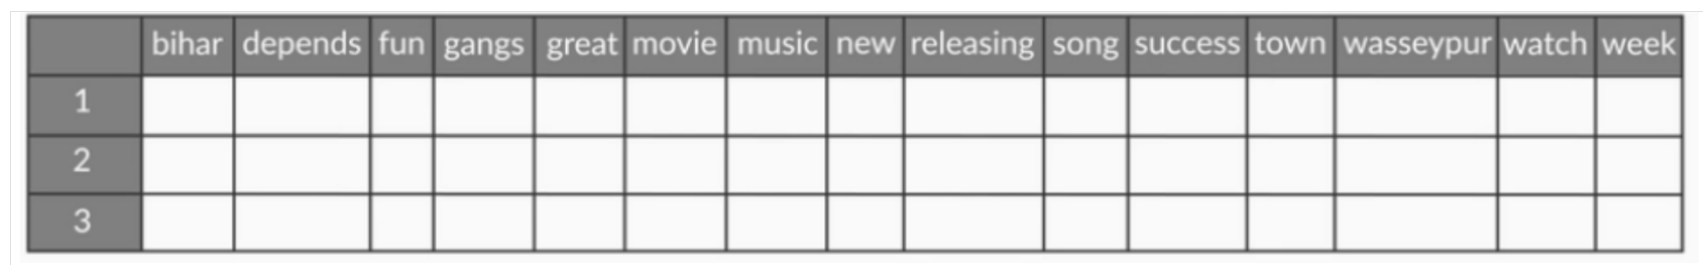

In [1]:
documents = ["Vapour, Bangalore has a really great terrace seating and an awesome view of the Bangalore skyline",
             "The beer at Vapour, Bangalore was amazing. My favorites are the wheat beer and the ale beer.",
             "Vapour, Bangalore has the best view in Bangalore."]

In [2]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stemmer = SnowballStemmer("english")

In [3]:
def preprocess(document):
    document = document.lower() 
    words = word_tokenize(document)
    words = [word for word in words if word not in stopwords.words("english")]
    words = [stemmer.stem(word) for word in words]
    document = " ".join(words)
    return document

In [4]:
documents = [preprocess(document) for document in documents]
documents

['vapour , bangalor realli great terrac seat awesom view bangalor skylin',
 'beer vapour , bangalor amaz . favorit wheat beer ale beer .',
 'vapour , bangalor best view bangalor .']

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(documents)
print(tfidf_model)

  (0, 12)	0.20472809091871683
  (0, 3)	0.40945618183743365
  (0, 8)	0.34663478992044555
  (0, 7)	0.34663478992044555
  (0, 11)	0.34663478992044555
  (0, 9)	0.34663478992044555
  (0, 2)	0.34663478992044555
  (0, 13)	0.2636246924033099
  (0, 10)	0.34663478992044555
  (1, 12)	0.15958136664279546
  (1, 3)	0.15958136664279546
  (1, 4)	0.8105842230034561
  (1, 1)	0.27019474100115204
  (1, 6)	0.27019474100115204
  (1, 14)	0.27019474100115204
  (1, 0)	0.27019474100115204
  (2, 12)	0.32401895323148033
  (2, 3)	0.6480379064629607
  (2, 13)	0.41723339721076924
  (2, 5)	0.5486117771118657


In [8]:
vectorizer.get_feature_names_out()

array(['ale', 'amaz', 'awesom', 'bangalor', 'beer', 'best', 'favorit',
       'great', 'realli', 'seat', 'skylin', 'terrac', 'vapour', 'view',
       'wheat'], dtype=object)

In [6]:
tfidf_model.toarray()

array([[0.        , 0.        , 0.34663479, 0.40945618, 0.        ,
        0.        , 0.        , 0.34663479, 0.34663479, 0.34663479,
        0.34663479, 0.34663479, 0.20472809, 0.26362469, 0.        ],
       [0.27019474, 0.27019474, 0.        , 0.15958137, 0.81058422,
        0.        , 0.27019474, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.15958137, 0.        , 0.27019474],
       [0.        , 0.        , 0.        , 0.64803791, 0.        ,
        0.54861178, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.32401895, 0.4172334 , 0.        ]])

In [9]:
import pandas as pd
pd.DataFrame(tfidf_model.toarray(), columns=vectorizer.get_feature_names_out())

,ale,amaz,awesom,bangalor,beer,best,favorit,great,realli,seat,skylin,terrac,vapour,view,wheat
0,0.000000,0.000000,0.346635,0.409456,0.000000,0.000000,0.000000,0.346635,0.346635,0.346635,0.346635,0.346635,0.204728,0.263625,0.000000
1,0.270195,0.270195,0.000000,0.159581,0.810584,0.000000,0.270195,0.000000,0.000000,0.000000,0.000000,0.000000,0.159581,0.000000,0.270195
2,0.000000,0.000000,0.000000,0.648038,0.000000,0.548612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.324019,0.417233,0.000000
